In [124]:
import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt

In [125]:
IMAGE_SIZE = 500
BATCH_SIZE = 16
CHANNELS = 3
EPOCHS = 50


In [126]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 501 files belonging to 2 classes.


In [127]:
class_names = dataset.class_names
print(class_names)

['hilly_area', 'rainforest']


In [128]:
len(dataset)

32

In [129]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    # print(image_batch[0].numpy())

(16, 500, 500, 3)
[1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1]


(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)


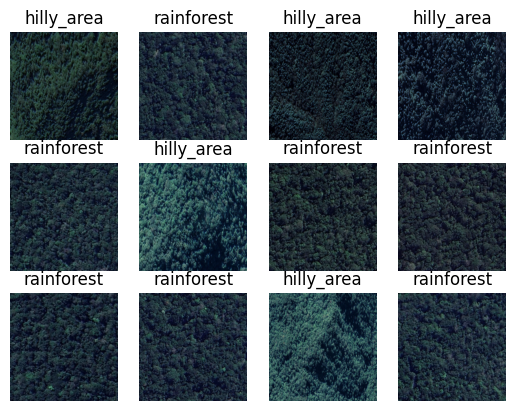

In [130]:
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])
        print(image_batch[i].shape)

In [131]:
train_size = 0.8
test_size = 0.1
val_size = 0.1
len(dataset)*train_size #80 % the data is to be used to train

25.6

In [132]:
train_ds = dataset.take(25)
len(train_ds)

25

In [133]:
test_ds = dataset.skip(25) 
len(test_ds)
len(dataset)*val_size

3.2

In [134]:
val_ds = test_ds.take(3)
len(val_ds)

3

In [135]:
test_ds = test_ds.skip(3)
len(test_ds)

4

In [136]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [137]:
train_ds,val_ds,test_ds = get_dataset_partition_tf(dataset)
print(len(train_ds),len(val_ds),len(test_ds))

25 3 4


In [138]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [139]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [140]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [144]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

In [145]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [146]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
25/25 [==============================] - 101s 4s/step - loss: 0.7242 - accuracy: 0.4900 - val_loss: 0.6431 - val_accuracy: 0.5208
Epoch 2/50
25/25 [==============================] - 86s 3s/step - loss: 0.5110 - accuracy: 0.7525 - val_loss: 0.4974 - val_accuracy: 0.6667
Epoch 3/50
25/25 [==============================] - 85s 3s/step - loss: 0.3187 - accuracy: 0.8650 - val_loss: 0.1891 - val_accuracy: 0.9167
Epoch 4/50
25/25 [==============================] - 86s 3s/step - loss: 0.1462 - accuracy: 0.9475 - val_loss: 0.0745 - val_accuracy: 0.9792
Epoch 5/50
25/25 [==============================] - 86s 3s/step - loss: 0.2241 - accuracy: 0.9150 - val_loss: 0.3371 - val_accuracy: 0.8542
Epoch 6/50
25/25 [==============================] - 94s 4s/step - loss: 0.3810 - accuracy: 0.8675 - val_loss: 0.1554 - val_accuracy: 0.9583
Epoch 7/50
25/25 [==============================] - 86s 3s/step - loss: 0.1375 - accuracy: 0.9575 - val_loss: 0.0672 - val_accuracy: 0.9792
Epoch 8/50
25/25 [=